# Train and Test with best params combination

## Data Preparation

In [194]:
import os
import sys

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

In [195]:
tf.__version__

'2.2.0'

In [196]:
import sklearn; sklearn.__version__

'0.21.2'

In [197]:
# load dataset
features = pandas.read_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features_1.csv', index_col=0)
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
0,-0.236240,-0.012063,-0.027807,-0.051443,-0.082820,-0.237137,-0.011746,-0.027222,-0.051066,-0.082349,...,48729.0,24515.0,1367.0,236539.0,100477.0,48721.0,24523.0,10601.0,5868.0,2136.0
1,-0.733787,-0.017003,-0.045150,-0.053358,-0.045559,-0.728479,-0.016115,-0.044458,-0.053728,-0.045010,...,40467.0,21751.0,4280.0,232788.0,104560.0,40835.0,21922.0,11688.0,5678.0,4187.0
2,-0.206548,-0.001990,-0.004977,-0.010344,-0.032882,-0.206663,-0.001933,-0.004869,-0.009837,-0.031671,...,51110.0,28460.0,3429.0,238953.0,98627.0,50426.0,28197.0,12380.0,5750.0,2853.0
3,-0.505051,-0.017088,-0.050502,-0.085439,-0.155965,-0.503971,-0.016430,-0.050478,-0.080363,-0.153229,...,46009.0,24784.0,4084.0,239878.0,106315.0,46383.0,25001.0,10550.0,6405.0,3401.0
4,-0.265025,-0.007068,-0.017015,-0.033292,-0.048008,-0.263057,-0.006823,-0.016241,-0.032975,-0.046946,...,50126.0,21473.0,3355.0,235508.0,96446.0,50054.0,21542.0,11100.0,6028.0,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,-0.104572,-0.000267,-0.001287,-0.004655,-0.018606,-0.104197,-0.000241,-0.001230,-0.004309,-0.018012,...,111718.0,57071.0,5266.0,478728.0,194404.0,110085.0,56729.0,26120.0,10705.0,4714.0
3333,-0.064313,-0.000214,-0.000820,-0.004044,-0.013585,-0.064493,-0.000202,-0.000685,-0.003693,-0.013236,...,100899.0,57721.0,5961.0,378640.0,180357.0,98690.0,57296.0,25947.0,13375.0,3125.0
3334,-0.477425,-0.000967,-0.004003,-0.008481,-0.038837,-0.476932,-0.000873,-0.004009,-0.007479,-0.036333,...,95367.0,62597.0,3067.0,491052.0,210852.0,92628.0,61759.0,24119.0,12008.0,6321.0
3335,-0.328624,-0.001875,-0.008336,-0.021885,-0.049970,-0.329515,-0.001693,-0.008131,-0.021180,-0.048207,...,101933.0,50380.0,5290.0,483699.0,219884.0,100631.0,49950.0,30214.0,9810.0,5397.0


In [198]:
# shuffle dataset
features = features.reindex(numpy.random.permutation(features.index))
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
3049,-0.785576,-0.008296,-0.039609,-0.101652,-0.181327,-0.782742,-0.007366,-0.038585,-0.102132,-0.181910,...,101406.0,47880.0,4837.0,456953.0,235647.0,101777.0,47765.0,26760.0,10303.0,6670.0
2242,-0.726786,-0.000231,-0.002101,-0.020969,-0.198744,-0.726736,-0.000180,-0.001577,-0.014590,-0.188684,...,92414.0,68127.0,7787.0,396331.0,177409.0,85459.0,67993.0,14318.0,13220.0,6937.0
2887,-1.673391,-0.002072,-0.015191,-0.073074,-0.240770,-1.676405,-0.001729,-0.014246,-0.070403,-0.240090,...,116357.0,55497.0,7043.0,434298.0,227846.0,114973.0,55347.0,24673.0,13972.0,5703.0
1959,-0.314677,-0.001478,-0.008460,-0.024828,-0.052989,-0.313523,-0.001275,-0.008145,-0.024960,-0.052882,...,106888.0,48171.0,6005.0,452388.0,241160.0,106719.0,47945.0,24737.0,13255.0,6652.0
307,-0.106518,-0.004947,-0.012770,-0.018741,-0.031234,-0.106345,-0.004793,-0.012666,-0.018499,-0.029976,...,43013.0,25968.0,2437.0,246066.0,107176.0,43220.0,26158.0,12823.0,6140.0,2648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,-0.584666,-0.006704,-0.023665,-0.058747,-0.102654,-0.582680,-0.006324,-0.023077,-0.058495,-0.100136,...,102648.0,47341.0,6309.0,491905.0,217728.0,101871.0,47306.0,24867.0,13529.0,6190.0
3192,-0.443331,-0.003047,-0.018994,-0.061773,-0.139975,-0.441565,-0.002547,-0.017681,-0.060793,-0.136950,...,103857.0,53248.0,6627.0,430745.0,233642.0,103506.0,53448.0,23343.0,11347.0,5866.0
1704,-0.633330,-0.001672,-0.013848,-0.068424,-0.182894,-0.633093,-0.001321,-0.012269,-0.067776,-0.179862,...,119558.0,50533.0,5582.0,406852.0,224912.0,118990.0,50307.0,26633.0,10101.0,6299.0
3150,-0.506734,-0.003485,-0.012475,-0.039650,-0.096496,-0.506390,-0.003306,-0.011996,-0.038122,-0.093512,...,109217.0,49689.0,7456.0,471633.0,214794.0,107929.0,49403.0,28259.0,10545.0,5216.0


In [199]:
# split dataset into target (y) and predictors (x)
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]

In [200]:
(timbral_rhythmic_predictors, predictors_with_pos_corr,
 wavelet_predictors) = break_into_subsets(features)

In [201]:
norm_pipelines = create_norm_pipelines(features)

In [202]:
list_ncols = [360, 108, 167, 252]

In [203]:
eval_metrics = {
    'all': [], 'tr': [], 'pos_corr': [],
    'wavelet': []
}

## Predictive Modelling (All Features)

In [247]:
# split all features into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [248]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

In [249]:
# best params for all features
params = {
    'units': 2, 'optimizer': 'adam', 'n_hidden': 2, 'lr': 0.0001,
    'kernel_initializer': 'glorot_uniform', 'filters': 32,
    'dropout': 0.15, 'activation': 'selu'
}

In [250]:
# learn model
model = training_best_model(X_train, y_train,
                                'model_all', list_ncols[0],
                                set_shape_create_cnn_model, 
                                norm_pipelines['all'], params, 
                                batch_size=25, epochs=200)

Model: "model_all"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_125 (Conv1D)          (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d_125 (MaxPoolin (None, 179, 32)           0         
_________________________________________________________________
conv1d_126 (Conv1D)          (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_126 (MaxPoolin (None, 88, 64)            0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_127 (MaxPoolin (None, 43, 96)            0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 4128)              0 

Epoch 45/200
86/86 [==============================] - 1s 16ms/step - loss: 0.7926 - accuracy: 0.6155 - val_loss: 0.7361 - val_accuracy: 0.7022
Epoch 46/200
86/86 [==============================] - 2s 20ms/step - loss: 0.7789 - accuracy: 0.6239 - val_loss: 0.7383 - val_accuracy: 0.7228
Epoch 47/200
86/86 [==============================] - 2s 23ms/step - loss: 0.7625 - accuracy: 0.6393 - val_loss: 0.7299 - val_accuracy: 0.7285
Epoch 48/200
86/86 [==============================] - 2s 22ms/step - loss: 0.7601 - accuracy: 0.6445 - val_loss: 0.7266 - val_accuracy: 0.7172
Epoch 49/200
86/86 [==============================] - 2s 22ms/step - loss: 0.7559 - accuracy: 0.6417 - val_loss: 0.7351 - val_accuracy: 0.6816
Epoch 50/200
86/86 [==============================] - 1s 16ms/step - loss: 0.7531 - accuracy: 0.6436 - val_loss: 0.7145 - val_accuracy: 0.7210
Epoch 51/200
86/86 [==============================] - 1s 16ms/step - loss: 0.7511 - accuracy: 0.6492 - val_loss: 0.7114 - val_accuracy: 0.7341

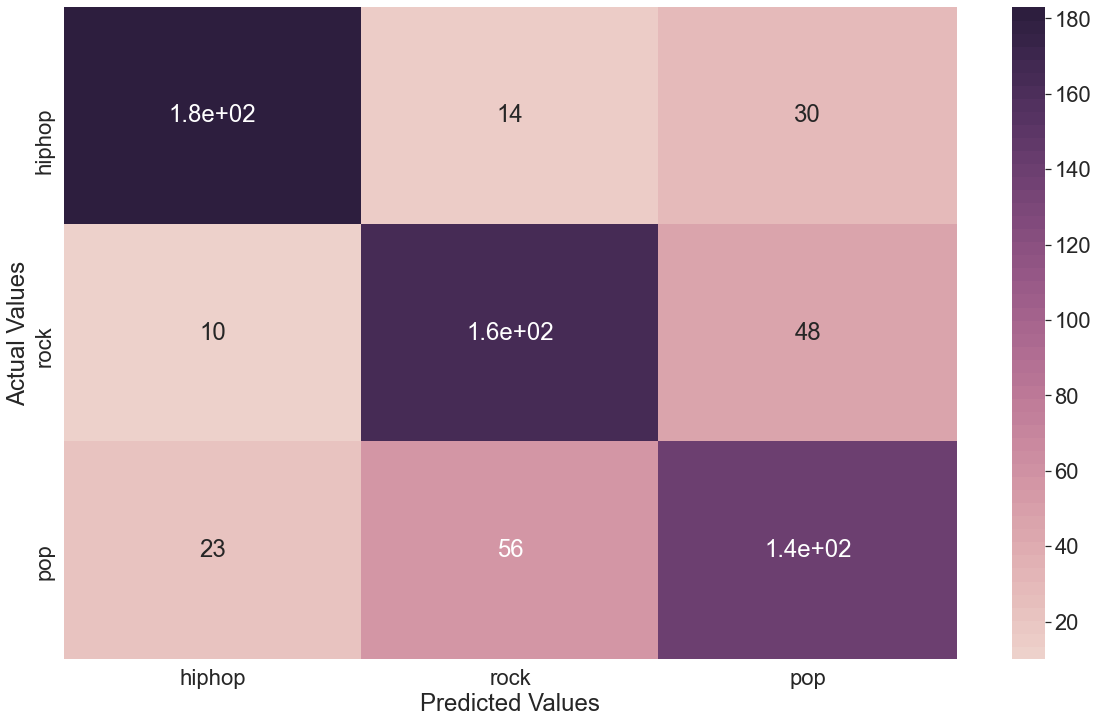

In [251]:
# plot confusion metrics as heat map
visualize_conf_metrics(X_test, y_test_encoded, model)

In [252]:
# compute evaluation metrics & add to dict
(accuracy, precision, recall, f1_score) = evaluate_model(X_test, y_test, model)
eval_metrics['all'] = [accuracy, precision, recall, f1_score]

In [253]:
accuracy, precision, recall, f1_score

(0.7290419161676647,
 0.7008547008547008,
 0.7387387387387387,
 0.7192982456140351)

accuracy,precision,recall,f1_score,batch,epooch
.738,.732,.742,.737,32,161
.744,.733,,746,.732,28,157
.755,.748,.751,.749,25,119 <>
0.7440119760479041,0.7688442211055276,0.7050691244239631,0.735576923076923,23,91
0.7380239520958084,0.7339449541284404,0.7373271889400922,0.7356321839080461,22,145
0.75,0.7324561403508771,0.7695852534562212,0.750561797752809,20,110
0.7455089820359282,0.7568807339449541,0.7534246575342466,0.7551487414187642,15,92

## Predictive Modelling (Timbral & Rhythmic Features)

In [211]:
# split timbral & rhythmic features into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    timbral_rhythmic_predictors, y, test_size=0.2, shuffle=True)

In [212]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

In [213]:
# best params for timbral & rhythmic features
params = {
    'units': 90, 'optimizer': 'adam','n_hidden': 1, 'lr': 0.0001,
    'kernel_initializer': 'glorot_uniform', 'filters': 32,
    'dropout': 0.25, 'activation': 'selu'
}

In [214]:
# learn model
model = training_best_model(X_train, y_train,
                                'model_tr', list_ncols[1],
                                set_shape_create_cnn_model, 
                                norm_pipelines['tr'], params, 
                                batch_size=15, epochs=200)

Model: "model_tr"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 106, 32)           128       
_________________________________________________________________
max_pooling1d_118 (MaxPoolin (None, 53, 32)            0         
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_119 (MaxPoolin (None, 25, 64)            0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_118 (Dense)            (None, 90)                144090    
_________________________________________________________________
dropout_72 (Dropout)         (None, 90)                0  

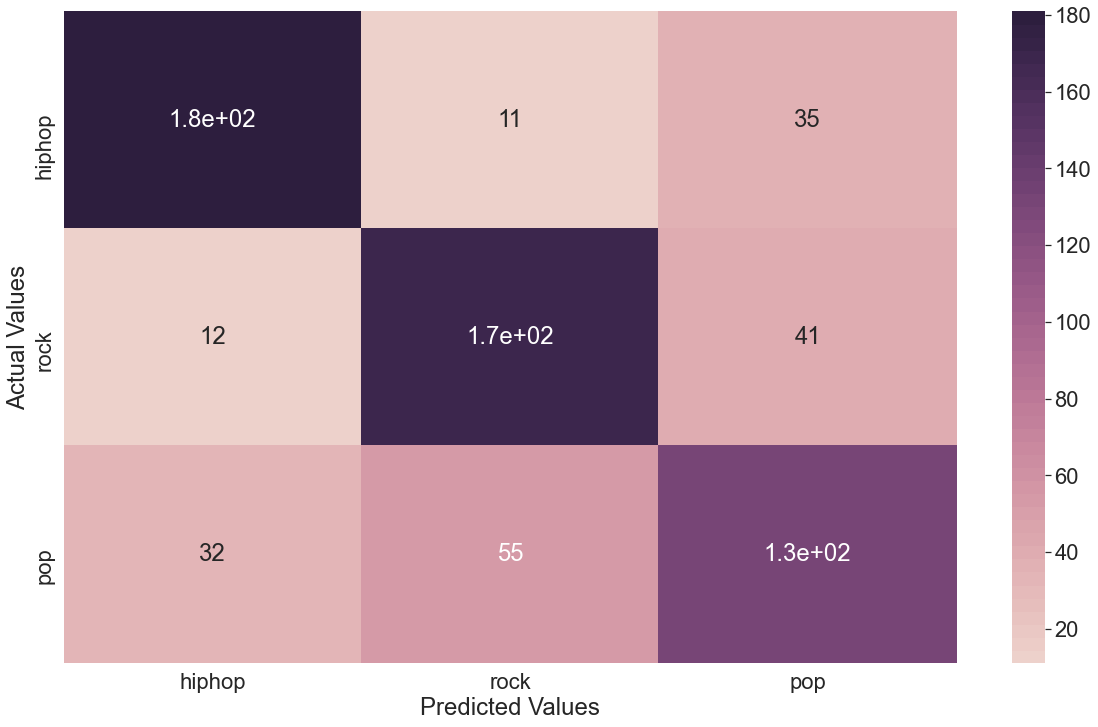

In [215]:
# plot confusion metrics as heat map
visualize_conf_metrics(X_test, y_test_encoded, model)

In [216]:
# compute evaluation metrics & add to dict
(accuracy, precision, recall, f1_score) = evaluate_model(X_test, y_test, model)
eval_metrics['tr'] = [accuracy, precision, recall, f1_score]

In [217]:
accuracy, precision, recall, f1_score

(0.7215568862275449,
 0.7191489361702128,
 0.7612612612612613,
 0.7396061269146608)

accuracy,precision,recall,f1_score,batch,epooch
0.75,0.7452830188679245,0.7596153846153846,0.7523809523809523,32,96
0.7470059880239521,0.7476190476190476,0.7548076923076923,0.7511961722488039,30,96
0.7485029940119761, 0.75, 0.7355769230769231, 0.7427184466019418,28,85
0.7335329341317365,0.7276995305164319,0.7451923076923077,0.7363420427553445,25,57
0.7470059880239521,0.7476190476190476,0.7548076923076923,0.7511961722488039,18,63
0.7529940119760479,0.7511961722488039,0.7548076923076923,0.7529976019184652,15,64 <>
0.7529940119760479,0.7524271844660194,0.7451923076923077,0.7487922705314008,13,60
0.7455089820359282, 0.75, 0.7355769230769231, 0.7427184466019418,10,52

## Predictive Modelling (Features with Positive Correlation)

In [218]:
# split features with pos corr into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    predictors_with_pos_corr, y, test_size=0.2, shuffle=True)

In [219]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

In [220]:
# best params for features with pos corr
params = {'units': 71, 'optimizer': 'rmsprop', 'n_hidden': 2, 'lr': 0.0003,
          'kernel_initializer': 'glorot_uniform', 'filters': 64, 
          'dropout': 0.1, 'activation': 'elu'}

In [221]:
# learn model
model = training_best_model(X_train, y_train,
                                'model_pos_corr', list_ncols[2],
                                set_shape_create_cnn_model, 
                                norm_pipelines['pos_corr'], params, 
                                batch_size=20, epochs=200)

Model: "model_pos_corr"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 165, 64)           256       
_________________________________________________________________
max_pooling1d_120 (MaxPoolin (None, 82, 64)            0         
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 80, 128)           24704     
_________________________________________________________________
max_pooling1d_121 (MaxPoolin (None, 40, 128)           0         
_________________________________________________________________
conv1d_122 (Conv1D)          (None, 38, 192)           73920     
_________________________________________________________________
max_pooling1d_122 (MaxPoolin (None, 19, 192)           0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 3648)           

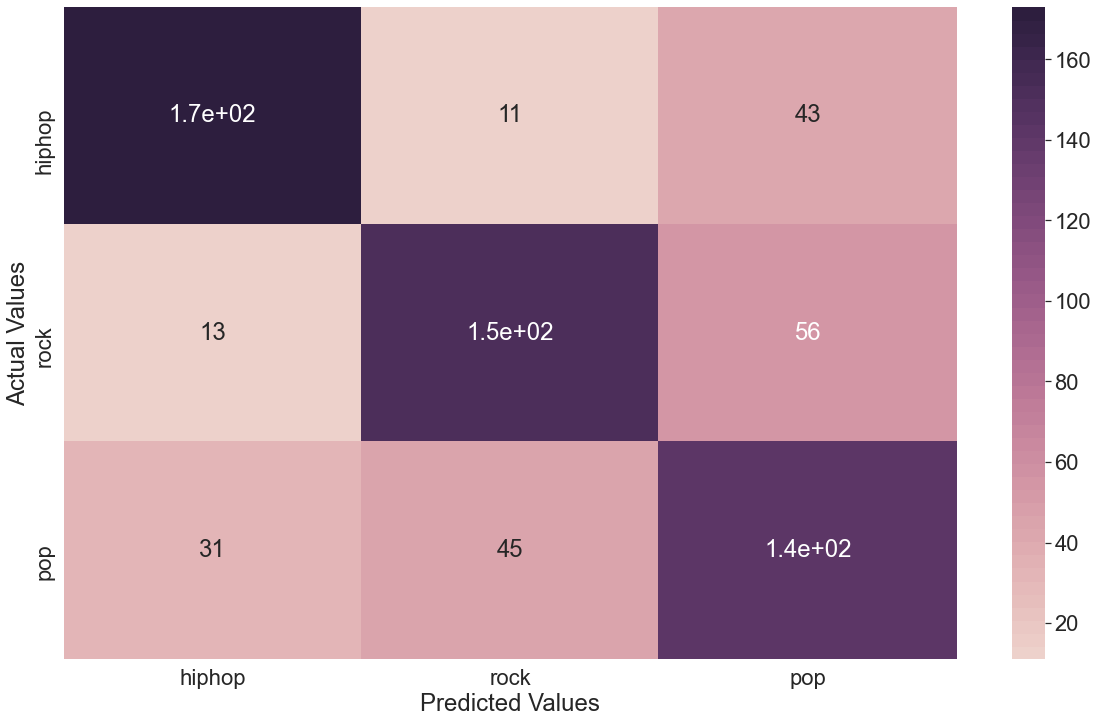

In [222]:
# plot confusion metrics as heat map
visualize_conf_metrics(X_test, y_test_encoded, model)

In [223]:
# compute evaluation metrics & add to dict
(accuracy, precision, recall, f1_score) = evaluate_model(X_test, y_test, model)
eval_metrics['pos_corr'] = [accuracy, precision, recall, f1_score]

In [224]:
accuracy, precision, recall, f1_score

(0.7020958083832335,
 0.7320574162679426,
 0.6891891891891891,
 0.7099767981438515)

accuracy,precision,recall,f1_score,batch,epooch
0.718562874251497, 0.688, 0.7853881278538812, 0.7334754797441364,32,39
0.6796407185628742,0.6763485477178424,0.7442922374429224,0.7086956521739131,30,19
0.7005988023952096,0.6952789699570815,0.7397260273972602,0.7168141592920354,28,25
0.7035928143712575,0.6960352422907489,0.7214611872146118,0.7085201793721972,25,25
0.7095808383233533,0.7298578199052133,0.7031963470319634,0.7162790697674418,20,25 <>
0.7050898203592815,0.7040358744394619,0.7168949771689498,0.7104072398190046,18,25
0.7080838323353293, 0.688034188034188, 0.7351598173515982, 0.7108167770419426,15,36

## Predictive Modelling (Wavelet Features)

In [225]:
# split wavelet features into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    wavelet_predictors, y, test_size=0.2, shuffle=True)

In [226]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

In [227]:
# best params for wavelet features
params = {
    'units': 90, 'optimizer': 'adam', 'n_hidden': 1, 'lr': 0.0001,
    'kernel_initializer': 'glorot_uniform', 'filters': 32,
    'dropout': 0.25, 'activation': 'selu'
}

In [228]:
# learn model
model = training_best_model(X_train, y_train,
                                'model_wav', list_ncols[3],
                                set_shape_create_cnn_model, 
                                norm_pipelines['wavelet'], params, 
                                batch_size=25, epochs=200)

Model: "model_wav"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_123 (Conv1D)          (None, 250, 32)           128       
_________________________________________________________________
max_pooling1d_123 (MaxPoolin (None, 125, 32)           0         
_________________________________________________________________
conv1d_124 (Conv1D)          (None, 123, 64)           6208      
_________________________________________________________________
max_pooling1d_124 (MaxPoolin (None, 61, 64)            0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 3904)              0         
_________________________________________________________________
dense_123 (Dense)            (None, 90)                351450    
_________________________________________________________________
dropout_75 (Dropout)         (None, 90)                0 

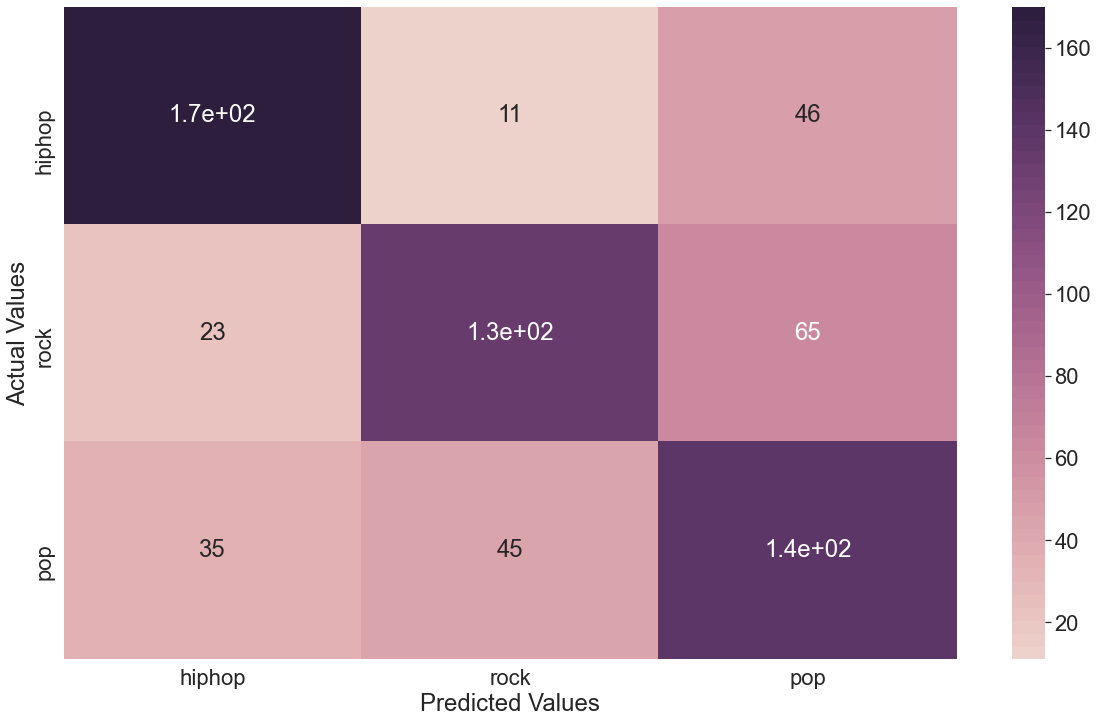

In [229]:
# plot confusion metrics as heat map
visualize_conf_metrics(X_test, y_test_encoded, model)

In [230]:
# compute evaluation metrics & add to dict
(accuracy, precision, recall, f1_score) = evaluate_model(X_test, y_test, model)
eval_metrics['wavelet'] = [accuracy, precision, recall, f1_score]

In [231]:
accuracy, precision, recall, f1_score

(0.6631736526946108,
 0.7052631578947368,
 0.6036036036036037,
 0.6504854368932039)

accuracy,precision,recall,f1_score,batch,epooch
0.6916167664670658,0.7230046948356808,0.7031963470319634,0.7129629629629628,32,53
0.6916167664670658,0.7342995169082126,0.6940639269406392,0.7136150234741784,28,53
0.6946107784431138,0.7255813953488373,0.7123287671232876,0.7188940092165899,25,53 <>
0.688622754491018, 0.7110091743119266, 0.7077625570776256, 0.7093821510297483,20,53
0.6946107784431138,0.7333333333333333,0.7031963470319634,0.7179487179487178,18,53
0.6901197604790419,0.7373737373737373,0.6666666666666666,0.7002398081534772,15,53
0.688622754491018, 0.6995515695067265, 0.7123287671232876, 0.7058823529411764,12,33

## Plot Evaluation Metrics

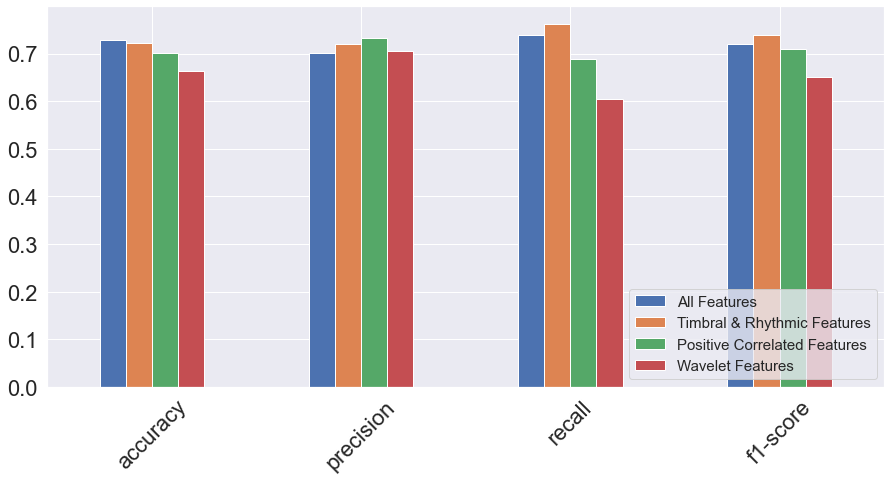

In [269]:
index = ['accuracy', 'precision', 'recall', 'f1-score']
df_metrics = pandas.DataFrame(
    data={
        'All Features': eval_metrics['all'], 
        'Timbral & Rhythmic Features': eval_metrics['tr'], 
        'Positive Correlated Features': eval_metrics['pos_corr'],
        'Wavelet Features': eval_metrics['wavelet']
    }, 
    index=index
)
df_metrics.plot.bar(rot=45, figsize=(15,7))
pyplot.legend(loc="lower right", fontsize=15)
pyplot.show()

## Train Final Model

In [270]:
X = timbral_rhythmic_predictors
y = to_categorical(y, 3)

In [271]:
# best params for timbral & rhythmic features
params = {
    'units': 90, 'optimizer': 'adam','n_hidden': 1, 'lr': 0.0001,
    'kernel_initializer': 'glorot_uniform', 'filters': 32,
    'dropout': 0.25, 'activation': 'selu'
}

In [272]:
# learn model
model = training_best_model(X, y,'model_final', list_ncols[1],
                            set_shape_create_cnn_model, 
                            norm_pipelines['tr'], params, 
                            batch_size=15, epochs=200)

Model: "model_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_128 (Conv1D)          (None, 106, 32)           128       
_________________________________________________________________
max_pooling1d_128 (MaxPoolin (None, 53, 32)            0         
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_129 (MaxPoolin (None, 25, 64)            0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_128 (Dense)            (None, 90)                144090    
_________________________________________________________________
dropout_78 (Dropout)         (None, 90)                

178/178 [==============================] - 1s 7ms/step - loss: 0.5483 - accuracy: 0.7685 - val_loss: 0.6135 - val_accuracy: 0.7530
Epoch 49/200
178/178 [==============================] - 1s 8ms/step - loss: 0.5466 - accuracy: 0.7718 - val_loss: 0.6490 - val_accuracy: 0.7290
Epoch 50/200
178/178 [==============================] - 1s 8ms/step - loss: 0.5414 - accuracy: 0.7714 - val_loss: 0.6058 - val_accuracy: 0.7395
Epoch 51/200
178/178 [==============================] - 1s 8ms/step - loss: 0.5350 - accuracy: 0.7778 - val_loss: 0.6157 - val_accuracy: 0.7290
Epoch 52/200
178/178 [==============================] - 1s 7ms/step - loss: 0.5352 - accuracy: 0.7819 - val_loss: 0.6258 - val_accuracy: 0.7260
Epoch 53/200
178/178 [==============================] - 1s 6ms/step - loss: 0.5292 - accuracy: 0.7763 - val_loss: 0.6071 - val_accuracy: 0.7365
Epoch 54/200
178/178 [==============================] - 1s 6ms/step - loss: 0.5245 - accuracy: 0.7842 - val_loss: 0.6482 - val_accuracy: 0.7216
Epoch

In [274]:
norm_pipe = model.named_steps['preprocess']
clf = model.named_steps['clf']

In [275]:
# save pipeline estimator to disk
norm_pipe_path = MOUNTED_DATASET_PATH + '/model/pipeline_estimator_3.pkl'
joblib.dump(norm_pipe, open(norm_pipe_path, 'wb'))

In [276]:
#  save keras model to disk
model_path = MOUNTED_DATASET_PATH + '/model/cnn_model_3.h5'
clf.model.save(model_path)